In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import warnings
import os

%matplotlib inline
warnings.filterwarnings("ignore")

Problem Statement

Republic of Indonesia Ministry of Health, has entrusted us with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Expectation involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

In [2]:
data = pd.read_excel('Contraceptive_method_dataset.xlsx')
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [3]:
data.shape

(1473, 10)

In [4]:
data.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [5]:
data[['Wife_age', 'No_of_children_born']].describe()

,Wife_age,No_of_children_born
count,1402.000000,1452.000000
mean,32.606277,3.254132
std,8.274927,2.365212
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


# Univariate Analysis

In [7]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

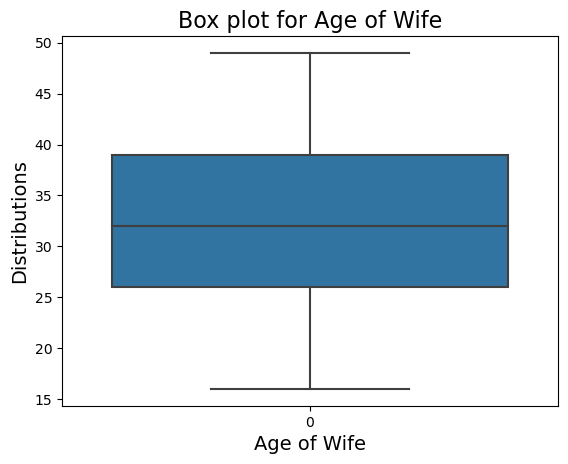

In [8]:
sns.boxplot(data['Wife_age'])
plt.title("Box plot for Age of Wife", fontsize=16)
plt.xlabel("Age of Wife", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

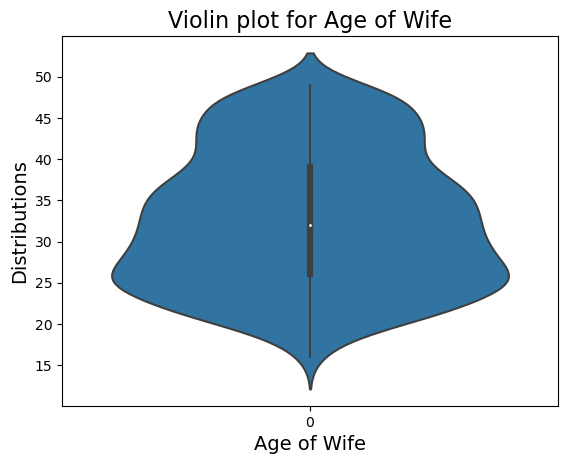

In [9]:
sns.violinplot(data['Wife_age'])
plt.title("Violin plot for Age of Wife", fontsize=16)
plt.xlabel("Age of Wife", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

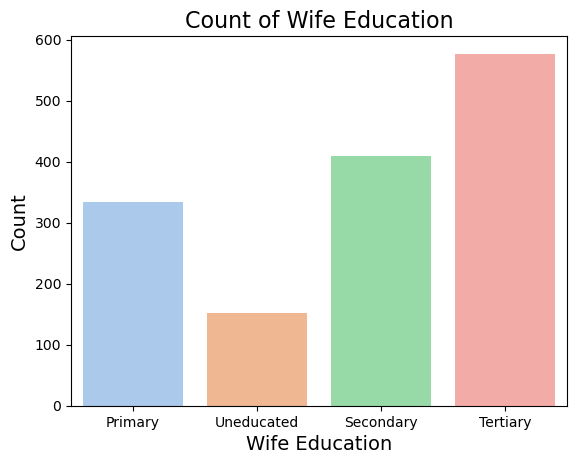

In [10]:
sns.countplot(x='Wife_ education', data=data, palette="pastel")
plt.title("Count of Wife Education", fontsize=16)
plt.xlabel("Wife Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

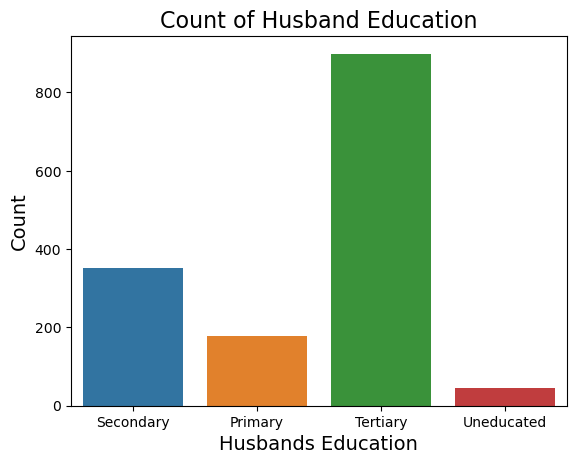

In [11]:
sns.countplot(x='Husband_education', data=data)
plt.title("Count of Husband Education", fontsize=16)
plt.xlabel("Husbands Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

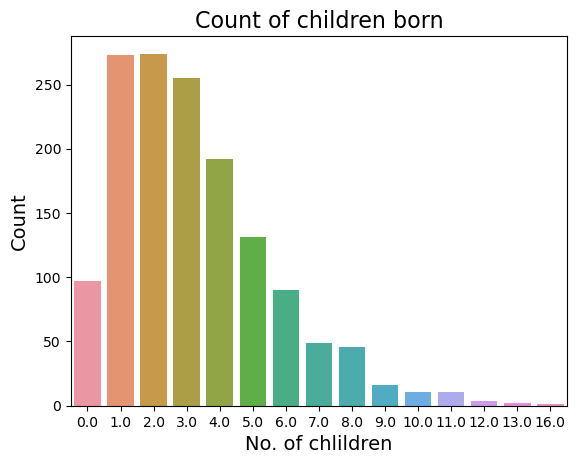

In [12]:
sns.countplot(x='No_of_children_born', data=data)
plt.title("Count of children born", fontsize=16)
plt.xlabel("No. of chlildren", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

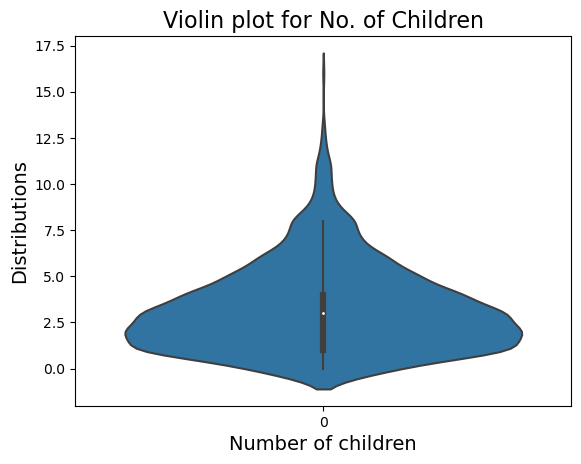

In [13]:
sns.violinplot(data['No_of_children_born'])
plt.title("Violin plot for No. of Children", fontsize=16)
plt.xlabel("Number of children", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

In [14]:
data['Wife_religion'].value_counts()

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64

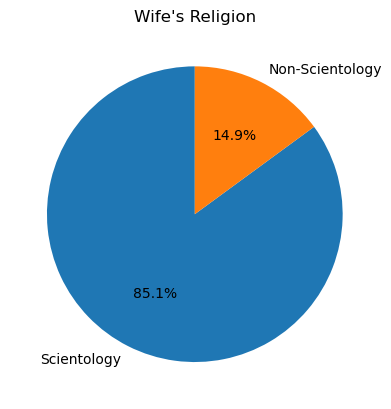

In [15]:
category_counts = data['Wife_religion'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Wife's Religion")
plt.show()

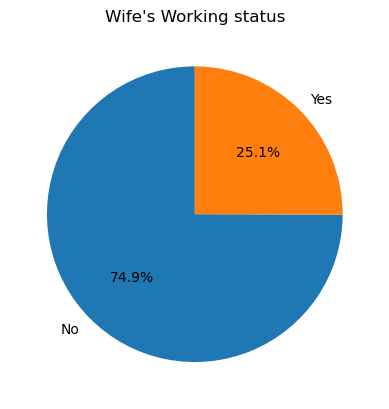

In [16]:
category_counts = data['Wife_Working'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Wife's Working status")
plt.show()

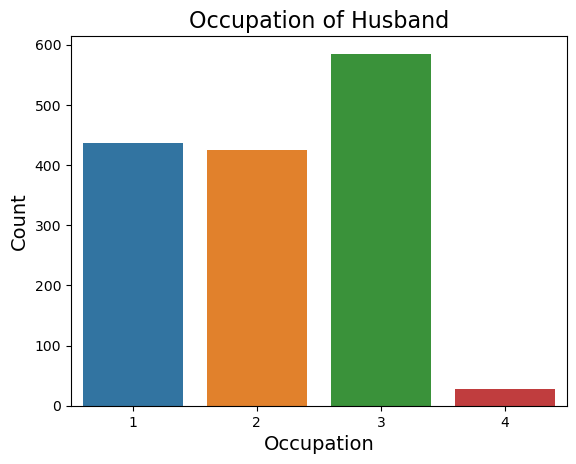

In [17]:
sns.countplot(x='Husband_Occupation', data=data)
plt.title("Occupation of Husband", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

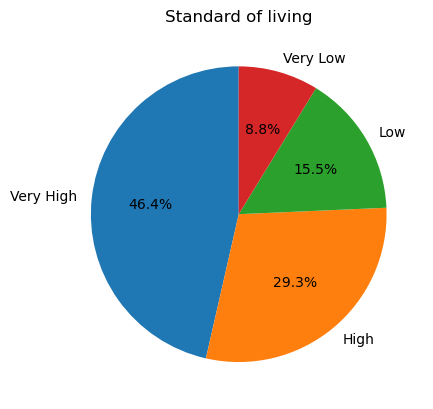

In [18]:
category_counts = data['Standard_of_living_index'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Standard of living")
plt.show()

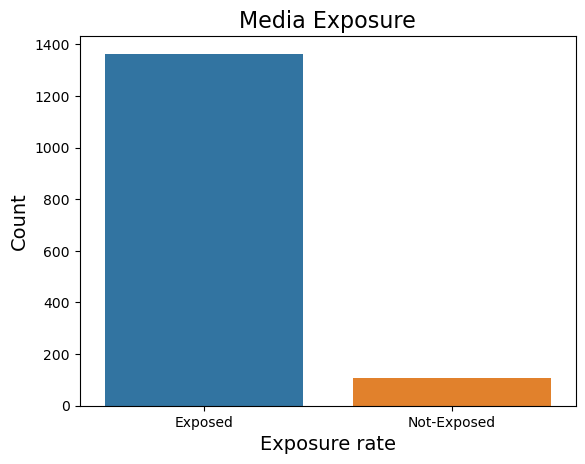

In [19]:
sns.countplot(x='Media_exposure ', data=data)
plt.title("Media Exposure", fontsize=16)
plt.xlabel("Exposure rate", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

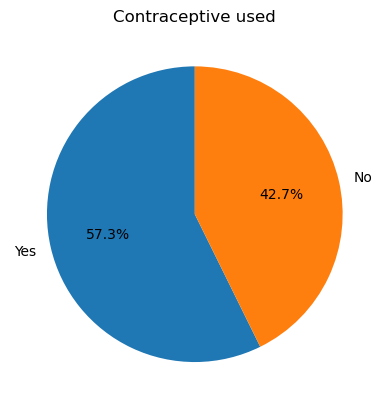

In [20]:
category_counts = data['Contraceptive_method_used'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Contraceptive used")
plt.show()

## Multivariate analysis

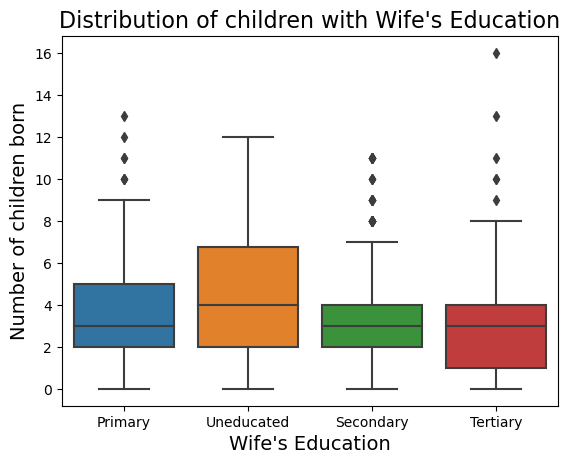

In [21]:
sns.boxplot(data=data, x='Wife_ education', y='No_of_children_born')
plt.xlabel("Wife's Education", fontsize=14)
plt.ylabel('Number of children born', fontsize=14)
plt.title("Distribution of children with Wife's Education", fontsize=16)
plt.show()

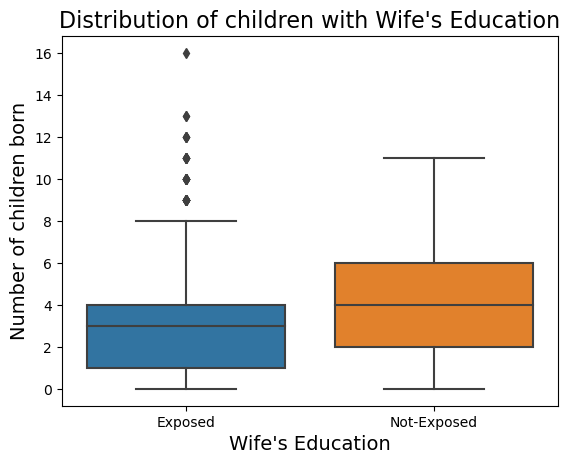

In [22]:
sns.boxplot(data=data, x='Media_exposure ', y='No_of_children_born')
plt.xlabel("Wife's Education", fontsize=14)
plt.ylabel('Number of children born', fontsize=14)
plt.title("Distribution of children with Wife's Education", fontsize=16)
plt.show()

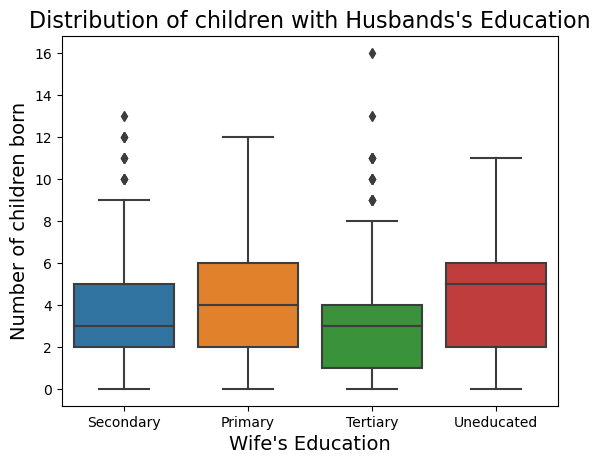

In [23]:
sns.boxplot(data=data, x='Husband_education', y='No_of_children_born')
plt.xlabel("Wife's Education", fontsize=14)
plt.ylabel('Number of children born', fontsize=14)
plt.title("Distribution of children with Husbands's Education", fontsize=16)
plt.show()

In [24]:
data.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [25]:
print(round(data['Wife_age'].mean(),1))
print(data['Wife_age'].median())

32.6
32.0


The variables Wife age follows a normal distribution. The mean and median appears to be same. This indicates we can either use mean or median for imputing nan values.

In [26]:
data['Wife_age'].fillna(data['Wife_age'].median(), inplace=True)

In [27]:
data['No_of_children_born'].fillna(data['No_of_children_born'].mode()[0], inplace=True)

In [28]:
data.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [29]:
data

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,2.0,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,2.0,Scientology,Yes,2,Low,Exposed,Yes


In [30]:
df1 = data.copy()

Converting categorical 

In [31]:
education_mapping = {'Uneducated': 1, 'Primary': 2, 'Secondary': 3, 'Tertiary': 4}
Wife_religion = {'Scientology': 1, 'Non-Scientology': 0}
Wife_Working = {'Yes': 1, 'No': 0}
standard_living = {'Very Low': 1, 'Low': 2, 'High': 3, 'Very High': 4}
media = {'Exposed': 1, 'Not-Exposed': 0}
df1['Wife_ education'] = df1['Wife_ education'].map(education_mapping)
df1['Husband_education'] = df1['Husband_education'].map(education_mapping)
df1['Wife_religion'] = df1['Wife_religion'].map(Wife_religion)
df1['Wife_Working'] = df1['Wife_Working'].map(Wife_Working)
df1['Standard_of_living_index'] = df1['Standard_of_living_index'].map(standard_living)
df1['Media_exposure '] = df1['Media_exposure '].map(media)

In [32]:
df1['Contraceptive_method_used'] = df1['Contraceptive_method_used'].map({'Yes': 1, 'No': 0})

If Contraceptive was used then the output will be "1" else "0"

In [33]:
df1.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,0
1,45.0,1,3,10.0,1,0,3,4,1,0
2,43.0,2,3,7.0,1,0,3,4,1,0
3,42.0,3,2,9.0,1,0,3,3,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0


# Logistic Regression

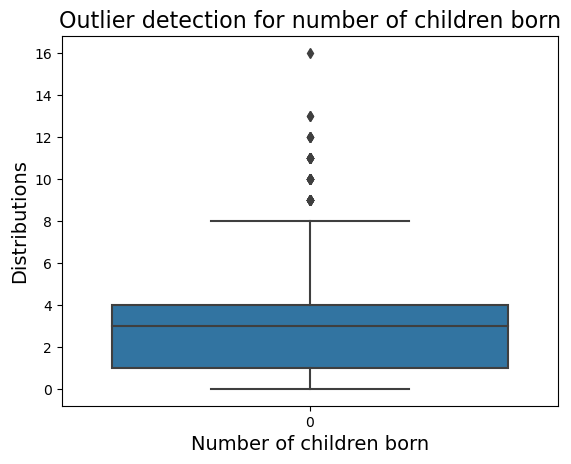

In [34]:
sns.boxplot(data['No_of_children_born'])
plt.title("Outlier detection for number of children born", fontsize=16)
plt.xlabel("Number of children born", fontsize=14)
plt.ylabel("Distributions", fontsize=14)
plt.show()

there are Outliers in the Number of children variable. Logistic regression can be sensitive to outliers, and their presence can influence the estimation of coefficients and impact the performance of the model. However, we will build two models one with the outliers if in case the outliers were of importance and one without if the outliers were a misleading information

In [35]:
X = df1.drop('Contraceptive_method_used', axis=1)
y = df1['Contraceptive_method_used']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

In [37]:
print(model_score)

0.6764705882352942


In [38]:
print(metrics.confusion_matrix(y_test, y_predict))

[[ 90  99]
 [ 44 209]]


In [39]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       189
           1       0.68      0.83      0.75       253

    accuracy                           0.68       442
   macro avg       0.68      0.65      0.65       442
weighted avg       0.68      0.68      0.66       442



### Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.

For class 0: Precision = 0.67
For class 1: Precision = 0.68
Interpretation: Out of all instances predicted as positive, 67% (class 0) and 68% (class 1) were actually positive.

### Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.

For class 0: Recall = 0.48
For class 1: Recall = 0.83
Interpretation: Out of all actual positive instances, the model captured 48% (class 0) and 83% (class 1).

### F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0: F1-Score = 0.56
For class 1: F1-Score = 0.75
Interpretation: The F1-score considers both precision and recall, providing a single metric that balances the trade-off between false positives and false negatives.

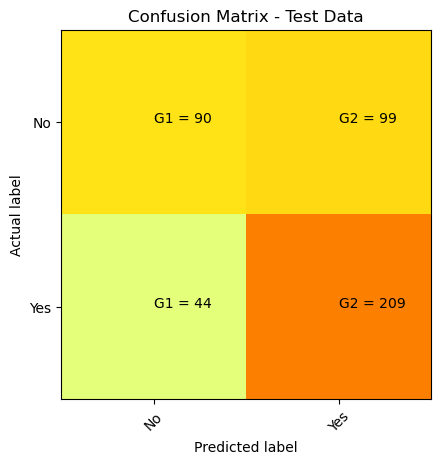

In [40]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

The above basic model works better when the domains point of focus is on Yes (Contraception Used) and compramise on No (Contraception not used).

In [41]:
df1

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,0
1,45.0,1,3,10.0,1,0,3,4,1,0
2,43.0,2,3,7.0,1,0,3,4,1,0
3,42.0,3,2,9.0,1,0,3,3,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,4,4,2.0,1,1,2,4,1,1
1469,33.0,4,4,2.0,1,0,1,4,1,1
1470,39.0,3,3,2.0,1,1,1,4,1,1
1471,33.0,3,3,2.0,1,1,2,2,1,1


<Axes: >

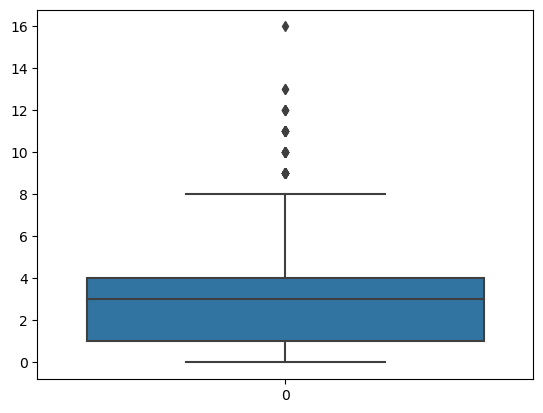

In [42]:
sns.boxplot(df1['No_of_children_born'])

In [43]:
len(df1.loc[df1['No_of_children_born']>8])

45

We will now assume that the outliers present in the Number of children variable is either wrong or miscalculation and women having children more than 5 belong to the same category of 5. There are a total of 230 records where the number of children born are above 5. We will cap those values to 5.

In [44]:
df2 = df1.copy()
df2

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,0
1,45.0,1,3,10.0,1,0,3,4,1,0
2,43.0,2,3,7.0,1,0,3,4,1,0
3,42.0,3,2,9.0,1,0,3,3,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,4,4,2.0,1,1,2,4,1,1
1469,33.0,4,4,2.0,1,0,1,4,1,1
1470,39.0,3,3,2.0,1,1,1,4,1,1
1471,33.0,3,3,2.0,1,1,2,2,1,1


In [45]:
len(df2.loc[df2['No_of_children_born']>5])

230

In [46]:
df2['No_of_children_born'] = np.where(df2['No_of_children_born'] > 5, 5, df2['No_of_children_born'])

In [47]:
len(df2.loc[df2['No_of_children_born']>5])

0

In [48]:
df2['Husband_education']

0       3
1       3
2       3
3       2
4       3
       ..
1468    4
1469    4
1470    3
1471    3
1472    3
Name: Husband_education, Length: 1473, dtype: int64

In [49]:
X = df2.drop(['Contraceptive_method_used'], axis=1)
y = df2['Contraceptive_method_used']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

In [51]:
print(model_score)

0.7217194570135747


In [52]:
print(metrics.confusion_matrix(y_test, y_predict))

[[105  84]
 [ 39 214]]


In [53]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63       189
           1       0.72      0.85      0.78       253

    accuracy                           0.72       442
   macro avg       0.72      0.70      0.70       442
weighted avg       0.72      0.72      0.71       442



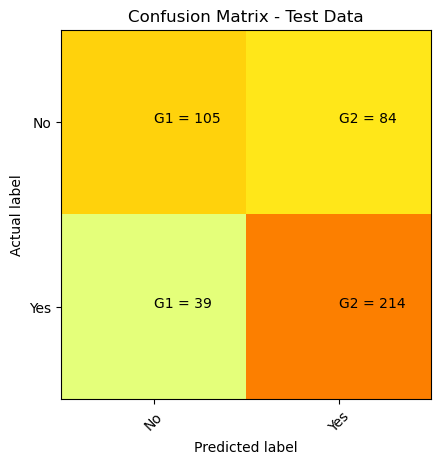

In [54]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Observations

### Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.

For class 0: Precision = 0.73

For class 1: Precision = 0.72

Interpretation: Out of all instances predicted as positive, 73% (class 0) and 72% (class 1) were actually positive.

### Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.

For class 0: Recall = 0.56

For class 1: Recall = 0.85

Interpretation: Out of all actual positive instances, the model captured 56% (class 0) and 85% (class 1).

### F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0: F1-Score = 0.63

For class 1: F1-Score = 0.78

Interpretation: The F1-score considers both precision and recall, providing a single metric that balances the trade-off between false positives and false negatives.

AUC: 0.759


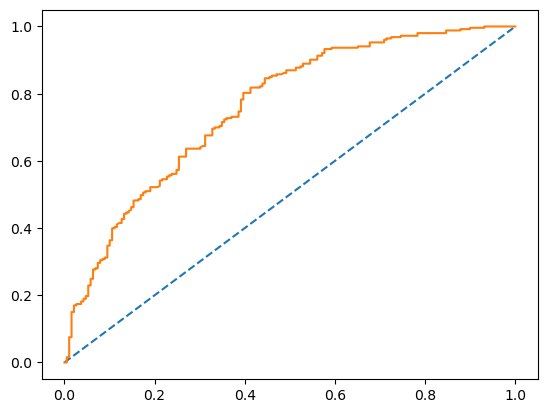

In [55]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Linear Discriminant Analysis (LDA)

In [56]:
df1

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,0
1,45.0,1,3,10.0,1,0,3,4,1,0
2,43.0,2,3,7.0,1,0,3,4,1,0
3,42.0,3,2,9.0,1,0,3,3,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,4,4,2.0,1,1,2,4,1,1
1469,33.0,4,4,2.0,1,0,1,4,1,1
1470,39.0,3,3,2.0,1,1,1,4,1,1
1471,33.0,3,3,2.0,1,1,2,2,1,1


In [57]:
df3 = df2.copy()

In [58]:
X = df3.drop('Contraceptive_method_used', axis=1)
y = df3['Contraceptive_method_used']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=7,stratify = y)

In [60]:
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [61]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis()

# Training and Testing

In [62]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

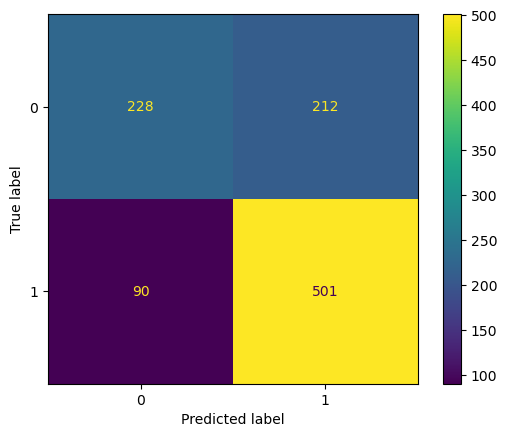

In [63]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Testing

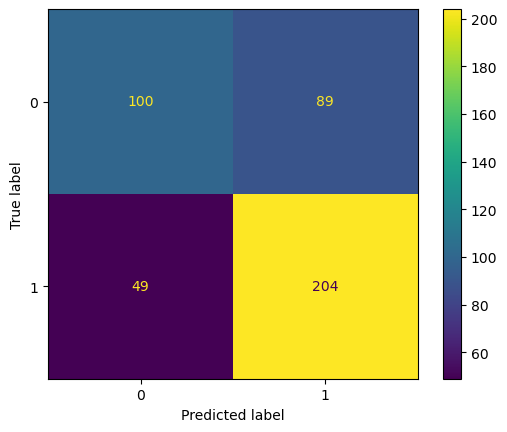

In [64]:
## Confusion matrix on the training data
cm = confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [65]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.52      0.60       440
           1       0.70      0.85      0.77       591

    accuracy                           0.71      1031
   macro avg       0.71      0.68      0.68      1031
weighted avg       0.71      0.71      0.70      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.53      0.59       189
           1       0.70      0.81      0.75       253

    accuracy                           0.69       442
   macro avg       0.68      0.67      0.67       442
weighted avg       0.69      0.69      0.68       442
 



# Observations

### Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.

For class 0: Precision = 0.72

For class 1: Precision = 0.70

Interpretation: Out of all instances predicted as positive, 72% (class 0) and 70% (class 1) were actually positive.

### Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.

For class 0: Recall = 0.52

For class 1: Recall = 0.85

Interpretation: Out of all actual positive instances, the model captured 52% (class 0) and 85% (class 1).

### F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0: F1-Score = 0.59

For class 1: F1-Score = 0.75

Interpretation: The F1-score considers both precision and recall, providing a single metric that balances the trade-off between false positives and false negatives.

### Probability prediction for the training and test data

In [66]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.751
AUC for the Test Data: 0.741


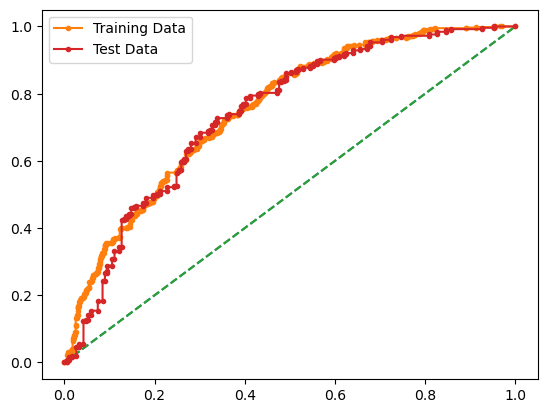

In [67]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Generate Coefficients and intercept for the Linear Discriminant Function

In [68]:
#intercept value
clf.intercept_ 

array([0.36725944])

In [69]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.80811272,  0.56125154, -0.00751916,  0.98548929, -0.09662846,
        -0.02366196,  0.01847876,  0.28976432,  0.13000846]])

In [70]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [71]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.81,  0.56, -0.01,  0.99, -0.1 , -0.02,  0.02,  0.29,  0.13]])

#### By the above equation and the coefficients it is clear that 
- predictor 'Number of children born' has the largest magnitude thus this helps in classifying the best 
- predictor 'Wife age' has the smallest magnitude thus this helps in classifying the least 
       



## LDF for the model

LDF=0.36725944+ X1*-0.81 + X2*(0.56) + X3*(-0.01) + X4*(0.99) + X5*(-0.1) + X6*(-0.02) + X7*0.02 + X8*0.29 + X9*0.13

# CART Model

In [72]:
X = df2.drop('Contraceptive_method_used', axis=1)
y = df2['Contraceptive_method_used']
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=3)

In [73]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state=3)

In [74]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=3)

In [75]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                               Imp
Wife_age                  0.312600
No_of_children_born       0.220006
Standard_of_living_index  0.118810
Wife_ education           0.103442
Husband_Occupation        0.071920
Wife_Working              0.062892
Husband_education         0.060903
Wife_religion             0.035914
Media_exposure            0.013513


In [76]:
dt_model.score(X_train,train_labels) 

0.979631425800194

In [77]:
dt_model.score(X_test, test_labels)

0.6221719457013575

### By looking at the training and testing score we can say that the model is overfitting a result of high variance.

In [78]:
param_grid = { 'max_features': ['auto','sqrt','log2'],
             'ccp_alpha': [0.1, 0.01,.001],
             'max_depth': [1,5,10,15,20],
             'min_samples_leaf':[1,5,10,15,20],
             'criterion': ['gini','entropy']}

tree_class = DecisionTreeClassifier(random_state=7)
grid_search = GridSearchCV(estimator=tree_class, param_grid= param_grid, cv=5, verbose=True)
grid_search.fit(X_train,train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [79]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='auto',
                       min_samples_leaf=5, random_state=7)

In [80]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5}

In [81]:
reg_dt_model =  DecisionTreeClassifier(criterion = 'gini',ccp_alpha= 0.001, max_depth = 10,min_samples_leaf=5, random_state=7)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=5,
                       random_state=7)

In [82]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)



In [83]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


### Getting the Predicted Classes

In [84]:
ytest_predict

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Getting the Predicted Probabilities

In [85]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)

In [86]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.291667,0.708333
1,0.969231,0.030769
2,0.969231,0.030769
3,0.195122,0.804878
4,0.195122,0.804878


### AUC and ROC for the training data

AUC: 0.865


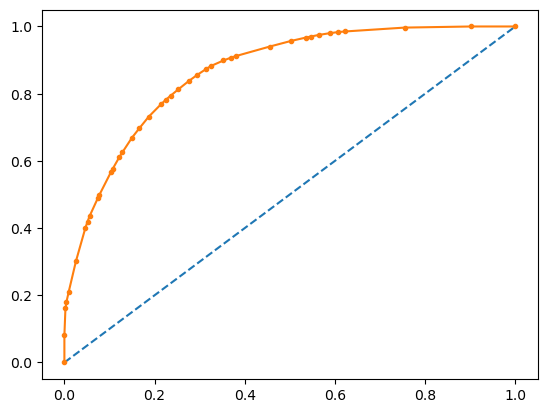

In [87]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.706


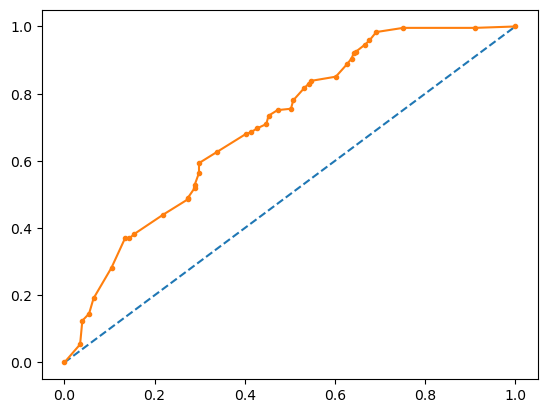

In [88]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [89]:
confusion_matrix(train_labels, ytrain_predict)

array([[289, 139],
       [ 71, 532]], dtype=int64)

In [90]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7963142580019399

In [91]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       428
           1       0.79      0.88      0.84       603

    accuracy                           0.80      1031
   macro avg       0.80      0.78      0.78      1031
weighted avg       0.80      0.80      0.79      1031



## Confusion Matrix for test data

In [92]:
confusion_matrix(test_labels, ytest_predict)

array([[ 99, 102],
       [ 53, 188]], dtype=int64)

In [93]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6493212669683258

In [94]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       201
           1       0.65      0.78      0.71       241

    accuracy                           0.65       442
   macro avg       0.65      0.64      0.63       442
weighted avg       0.65      0.65      0.64       442

